In [1]:
# Importing required libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# Initializing the CNN
model = Sequential()

# Step 1 - Convolution Layer
model.add(Conv2D(32, (3, 3), input_shape = (30, 30, 3), activation = 'relu'))

# Step 2 - Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
model.add(Conv2D(30, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening Layer
model.add(Flatten())

# Full connection (Neural Network)
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 5, activation = 'softmax')) # output layer with 4 neurons for 4 classes


In [3]:
# Compile the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 30)        8670      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 30)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1080)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [4]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"C:\Users\Arati V Kathe\Downloads\archive (8)\flowers\Train",
                                                 target_size = (30, 30),
                                                 batch_size = 5,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r"C:\Users\Arati V Kathe\Downloads\archive (8)\flowers\Test",
                                            target_size = (30, 30),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 3054 images belonging to 5 classes.
Found 594 images belonging to 5 classes.


In [5]:
training_set.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [6]:
import cv2

In [7]:
# Train the CNN
model.fit(training_set,
          epochs = 30,
          validation_data = test_set)

Epoch 1/30
611/611 [==============================] - 44s 69ms/step - loss: 1.2558 - accuracy: 0.4574 - val_loss: 1.1270 - val_accuracy: 0.4983
Epoch 2/30
611/611 [==============================] - 13s 21ms/step - loss: 1.0834 - accuracy: 0.5616 - val_loss: 1.2229 - val_accuracy: 0.5253
Epoch 3/30
611/611 [==============================] - 12s 20ms/step - loss: 0.9881 - accuracy: 0.6018 - val_loss: 1.1074 - val_accuracy: 0.5926
Epoch 4/30
611/611 [==============================] - 12s 19ms/step - loss: 0.9363 - accuracy: 0.6290 - val_loss: 1.0179 - val_accuracy: 0.5943
Epoch 5/30
611/611 [==============================] - 12s 20ms/step - loss: 0.8634 - accuracy: 0.6650 - val_loss: 1.0428 - val_accuracy: 0.5993
Epoch 6/30
611/611 [==============================] - 12s 20ms/step - loss: 0.8112 - accuracy: 0.6866 - val_loss: 0.9416 - val_accuracy: 0.6481
Epoch 7/30
611/611 [==============================] - 12s 19ms/step - loss: 0.7739 - accuracy: 0.7020 - val_loss: 0.9544 - val_accuracy:

In [8]:
model.save('flowers_classifier.h5')

pip install opencv-python-headless==4.5.2.52 --user

In [9]:
import cv2

In [10]:
from tensorflow import keras


In [11]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import matplotlib.pyplot as plt 

#import cv2
%matplotlib inline

In [42]:
def model_output(path):
    raw_img = image.load_img(path, target_size=(30, 30))
    img_arr = image.img_to_array(raw_img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0

    # Load the pre-trained model
    model = keras.models.load_model('flowers_classifier.h5')

    # Predict class probabilities
    class_probs = model.predict(img_arr)

    # Get the predicted class label
    predicted_class_idx = np.argmax(class_probs, axis=-1)
    class_labels = ['daisy', 'dandelion', 'rose', 'tulip', 'sunflower'] # replace with actual class labels
    predicted_class_label = class_labels[predicted_class_idx[0]]

    # Display the image and predicted class
    plt.imshow(cv2.imread(path))
    plt.title(predicted_class_label)
    plt.show()

In [43]:
import os 
os.chdir(r"C:\Users\Arati V Kathe\Downloads\archive (8)\flowers\Live_data_for_check")

1/1 [==============================] - 0s 45ms/step


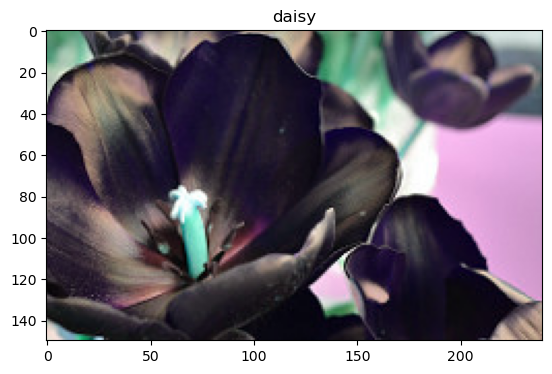

In [44]:
model_output("7166612682_711e680027_n.jpg")

1/1 [==============================] - 0s 61ms/step


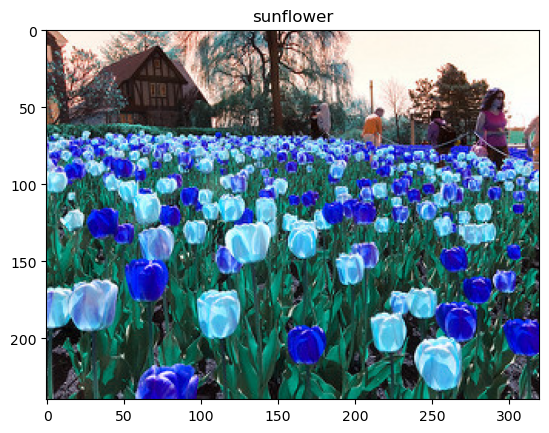

In [45]:
model_output("779359602_30abcbf5bb_n.jpg")

1/1 [==============================] - 0s 53ms/step


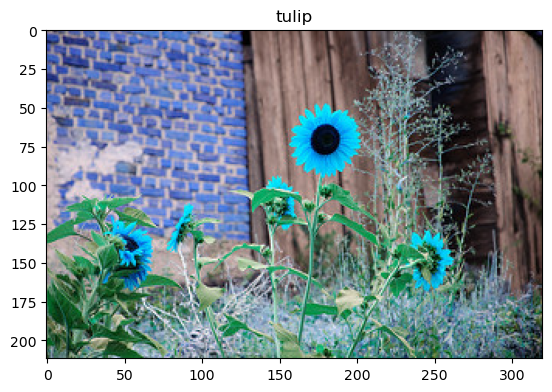

In [46]:
model_output("9783416751_b2a03920f7_n.jpg")

1/1 [==============================] - 0s 52ms/step


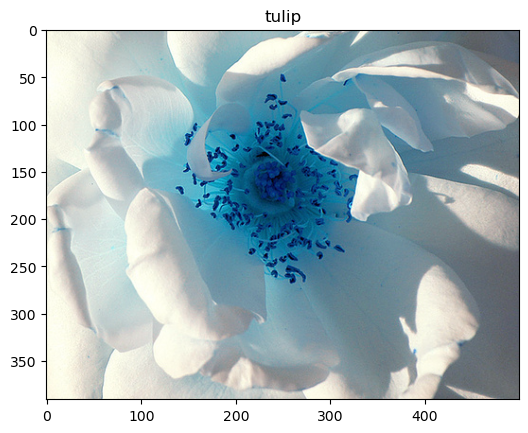

In [47]:
model_output("898102603_2d5152f09a.jpg")

1/1 [==============================] - 0s 59ms/step


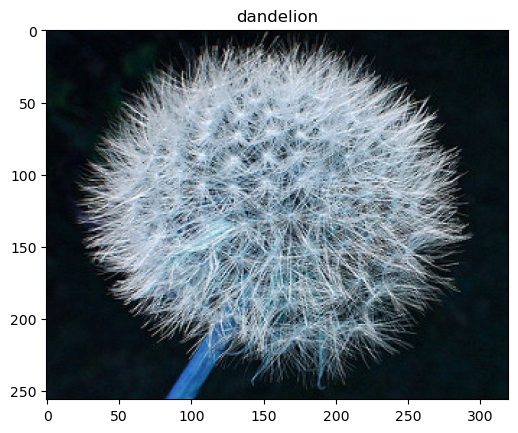

In [48]:
model_output("5024965767_230f140d60_n.jpg")

1/1 [==============================] - 0s 56ms/step


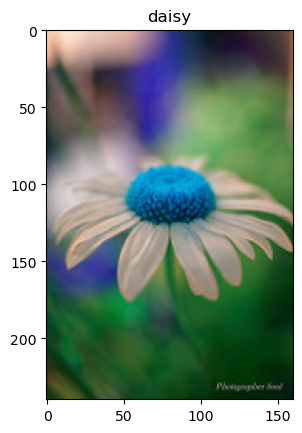

In [49]:
model_output("5904946193_bd1eb1f39d_n.jpg")

1/1 [==============================] - 0s 60ms/step


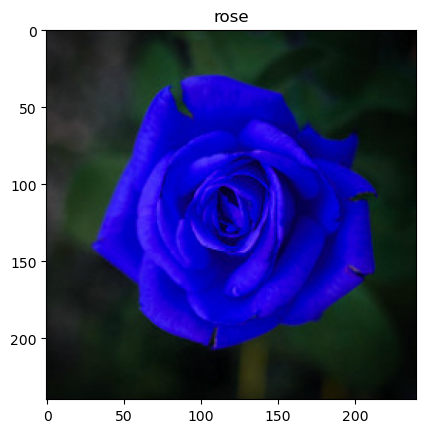

In [50]:
model_output("8032328803_30afac8b07_m.jpg")